<a href="https://colab.research.google.com/github/dipesh0078/PyTorch-Workflow/blob/main/Chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

whar_we_are_covering={1:"data(prepare and load)",
                       2:"build model",
                       3:"Fitting the model to data (training)"
                       4:"making predictions and evaluting a model (inference)"
                       5: "saving and loading a model"
                       6:"putting it all together"}

In [167]:
whar_we_are_covering={1:"data(prepare and load)",
                      2:"build model",
                      3:"Fitting the model to data (training)"
                       4:"making predictions and evaluting a model (inference)"
                      5: "saving and loading a model"
                      6:"putting it all together"}

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-167-20f42a727fe5>, line 3)

In [168]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.1.0+cu121'

##1. Data preparing and loading
Data can be almost anything

*Excel spreadsheet
*Images of any kind
*Audio
*DNA Pattern etc

Machine learning is a game of two parts :
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

We will use linear regression formula to make a straight line with known parameters.

In [169]:
# Create *Known* parameters
# Y=a+bX

weight=0.7 #its b
bias=0.3 #its a

#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10]
y[:10]

len(X)
len(y)



50

### Splitting data into training and test sets (important in ML)
Let's create a traning and test set with our data

In [170]:
#Create a train/test split

train_split=int(0.8*len(X))
X_train=X[:train_split]
y_train=y[:train_split]
X_test=X[train_split:]
y_test=y[train_split:]
len(X_train)

40

#Visulizing Data

In [171]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels, c="b",s=4,label="Training data")
  #Plot test data in green

  plt.scatter(test_data,test_labels,c="g",s=4, label="Testing data")

  #Are there predictions?

  if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size":14});


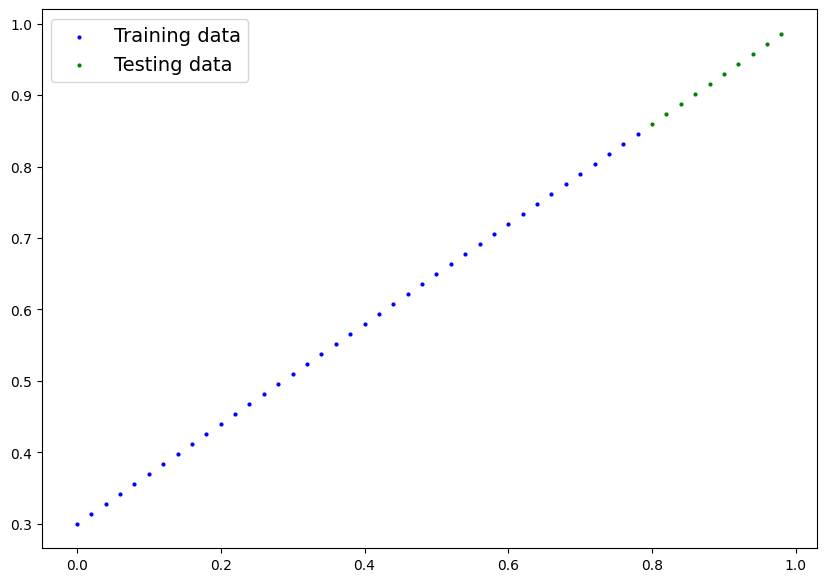

In [172]:
plot_predictions();

##2. Build model

our first PyTorch model

What our model does:

*Start with random values (weight and bias)
*Look at training data and adjust the random values to better
represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms
1. Gradient descent
2. Back Propagation

In [173]:
#Create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
# forward method to define the computation in the model

  def forward(self,x:torch.Tensor)->torch.Tensor:#<-"x" is th einput data
    return self.weight*x+self.bias #thi is the linear regression formula


###Pytorch model building essentials

* torch.nn--contains all of the buildings block for computational graphs (a neural network can be considered computational graphs)

* torch.nn.Parameter- what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us

* torch.nn.Module- The base class for all neural networks modules, if we subclass it, we should overwrite forward()

* torch.optim- this is where the optimizers in pytorch live, they will help with gradient descent

* def forward()- All nn.Module subclasses require we need to overwrite forward(), this method defines what happens in the forward computation


###Checking The contents of our PyTorch  model

We can check our model parameter or what is inside our model suing .parameters()


In [174]:
#Create a random seed

torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)

model_0= LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [175]:
#List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

TO check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`
when we pass data through our model it will go through the `forward()` method.

In [176]:
#Make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

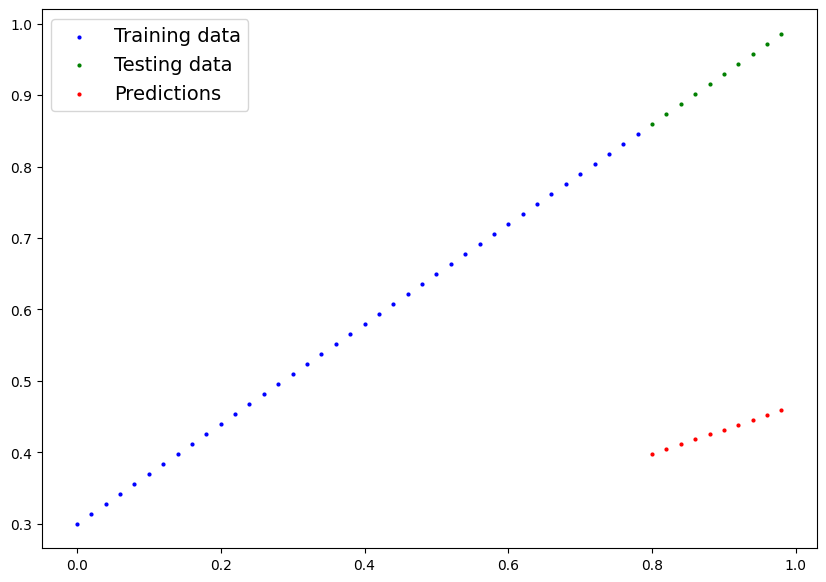

In [177]:
plot_predictions(predictions=y_preds)

##3. Train model
 The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong our models predictions are is to use a loss function

* Note Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss Function:** A function to measure how wrong our model's predictions are to the ideal output

* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters

And specifically for pytorch, we need:
* A training loop
* A testing loop


In [178]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [179]:
#check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [180]:
#Setup loss function
loss_fn=nn.L1Loss()

#Setup an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01) #stochastic gradient descent lr: learning rate (hyperparameter)

Q: Which loss function and optimizer should I use?

A: This will be problem specific. But with experience, we will get an idea of what works and what does'nt with our particular problem set.

For example, for a regression problem(like ours) a loss function of nn.L1Loss()
and an optimizer like torch.optim.SGD() will suffice.

But for a classification problems like classifying whether a photo is of a dog or a cat, we will likely want to use a losss function of nn.BCELoss() (binary creoo entropy loss).

###Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0.Loop through the data
1. Forward pass (this involves data moving through our model's `Forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3.Optimizer zero grad
4. Loss backward= move backwards through the network
5.Optimizer step- use the optimizer to adjust our model's parameters to try and improve the loss
                 


In [181]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [184]:
#An epocj is one loop through the data....(this is a hyper parameter we've set it)
epochs=200
###Training
#Track Different values
epoch_count=[]
loss_values=[]
test_loss_values=[]
#0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients
#1.Forward pass
  y_pred=model_0(X_train)

#2. Calculate the loss
  loss=loss_fn(y_pred,y_train)
  print(loss)

#3. Optimizer zero grad
  optimizer.zero_grad()

#4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
#5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next itertaion of the loop
## Testing
  model_0.eval() #turn off gradient tracking
  with torch.inference_mode():
    #1. DO the forward pass
    test_pred=model_0(X_test)

    #2. Calculate Test loss
    test_loss=loss_fn(test_pred, y_test)
  #Print Out what is happening
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}| test:{loss}|Test loss:{test_loss}")
     #print out model state_dict()
    print(model_0.state_dict())


tensor(0.2898, grad_fn=<MeanBackward0>)
Epoch:0| test:0.28983935713768005|Test loss:0.4541231691837311
OrderedDict([('weight', tensor([0.3484])), ('bias', tensor([0.1588]))])
tensor(0.2783, grad_fn=<MeanBackward0>)
tensor(0.2668, grad_fn=<MeanBackward0>)
tensor(0.2553, grad_fn=<MeanBackward0>)
tensor(0.2438, grad_fn=<MeanBackward0>)
tensor(0.2322, grad_fn=<MeanBackward0>)
tensor(0.2207, grad_fn=<MeanBackward0>)
tensor(0.2092, grad_fn=<MeanBackward0>)
tensor(0.1977, grad_fn=<MeanBackward0>)
tensor(0.1862, grad_fn=<MeanBackward0>)
tensor(0.1746, grad_fn=<MeanBackward0>)
Epoch:10| test:0.1746293306350708|Test loss:0.3194132149219513
OrderedDict([('weight', tensor([0.3874])), ('bias', tensor([0.2588]))])
tensor(0.1631, grad_fn=<MeanBackward0>)
tensor(0.1516, grad_fn=<MeanBackward0>)
tensor(0.1401, grad_fn=<MeanBackward0>)
tensor(0.1285, grad_fn=<MeanBackward0>)
tensor(0.1170, grad_fn=<MeanBackward0>)
tensor(0.1061, grad_fn=<MeanBackward0>)
tensor(0.0968, grad_fn=<MeanBackward0>)
tensor(0.0

In [199]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.28983936, 0.17462933, 0.07638873, 0.05069301, 0.04463796,
       0.04098063, 0.03750344, 0.03407188, 0.03063862, 0.02719982,
       0.02376995, 0.020335  , 0.01689645, 0.01346802, 0.01003139,
       0.00659453, 0.00316608, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

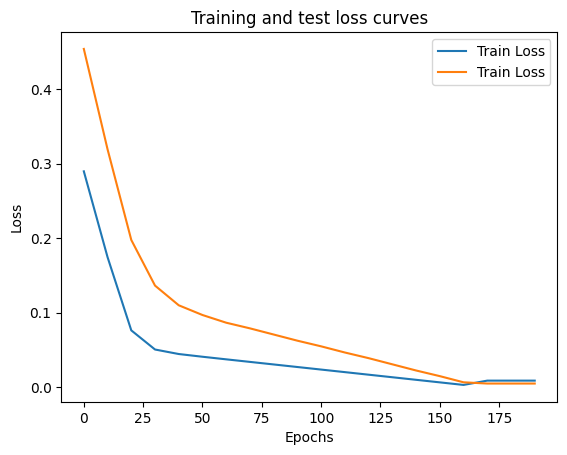

In [201]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="Train Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [185]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

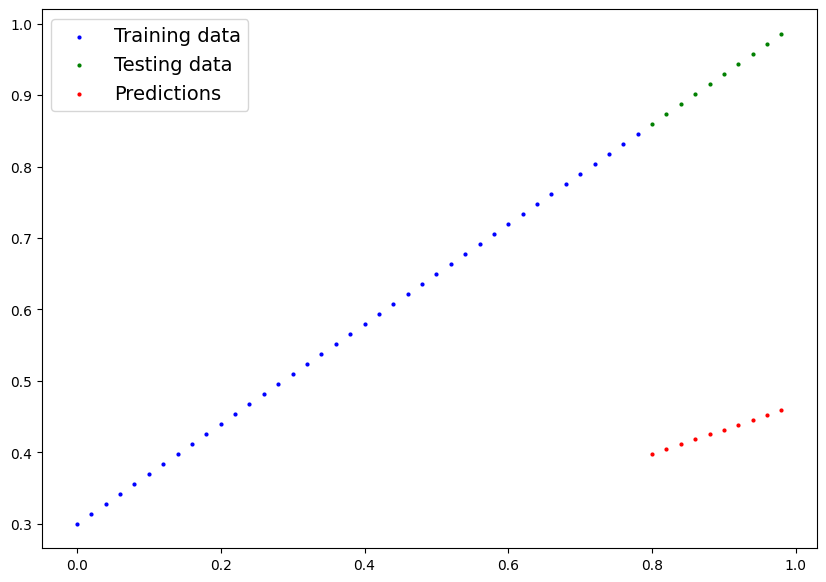

In [186]:
plot_predictions(predictions=y_preds)

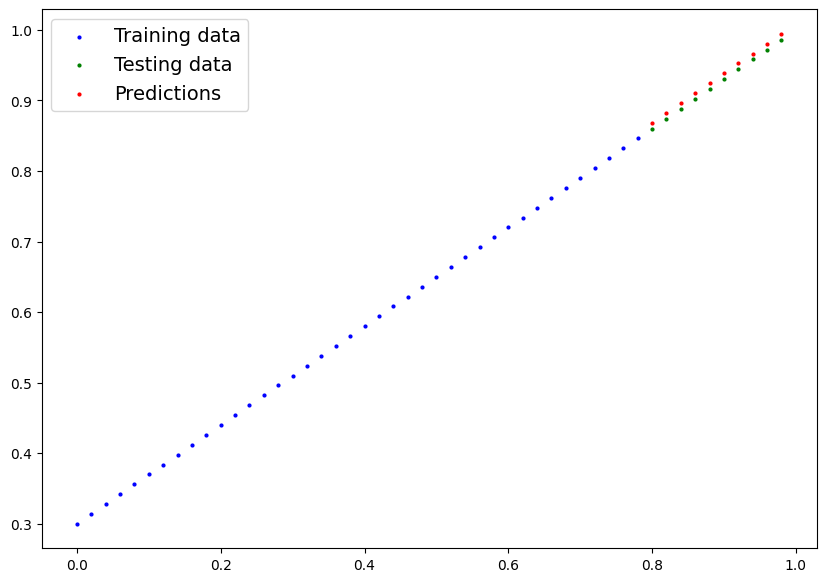

In [187]:
plot_predictions(predictions=y_preds_new)

In [188]:
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [189]:
weight, bias

(0.7, 0.3)

#Saving a model in Pytorch

There are three main methods for saving and loading in PyTorch

1. `torch.save()` -allows us to save a PyTorch object in python's pickle formate
2. `torch.load()`- allows us to load a saved PyTorch object
3. `torch.nn.Module_load_state_dict()`- this allows to load a model's saved state dictionary

In [204]:
#Saving our Pytorch model

from pathlib import Path
#1. Create model directory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#SAVE the model state dic()
print(f"SAVING model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

SAVING model to:models/01_pytorch_workflow_model_0.pth
